In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#Load Data
data = pd.read_csv('admission_data.csv')
data.head()

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,NaN
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,NaN
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,NaN
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,NaN
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,NaN


In [ ]:
import numpy as np

data
data['Admitted'] = np.where(data['Chance of Admit ']>= 0.9, 1, 0)
data.head()

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9,Admitted
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,NaN,1
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,NaN,0
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,NaN,0
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,NaN,0
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,NaN,0


In [ ]:
#Check The column names
data.columns

Index(['Name', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'Chance of Admit ', 'Admitted'],
      dtype='object')

In [ ]:
#Select the appropriate Features
feature_cols = ['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research']
X = data[feature_cols] # Features
y = data.Admitted # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Building Decision Tree Model


In [ ]:

 #Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating the model

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


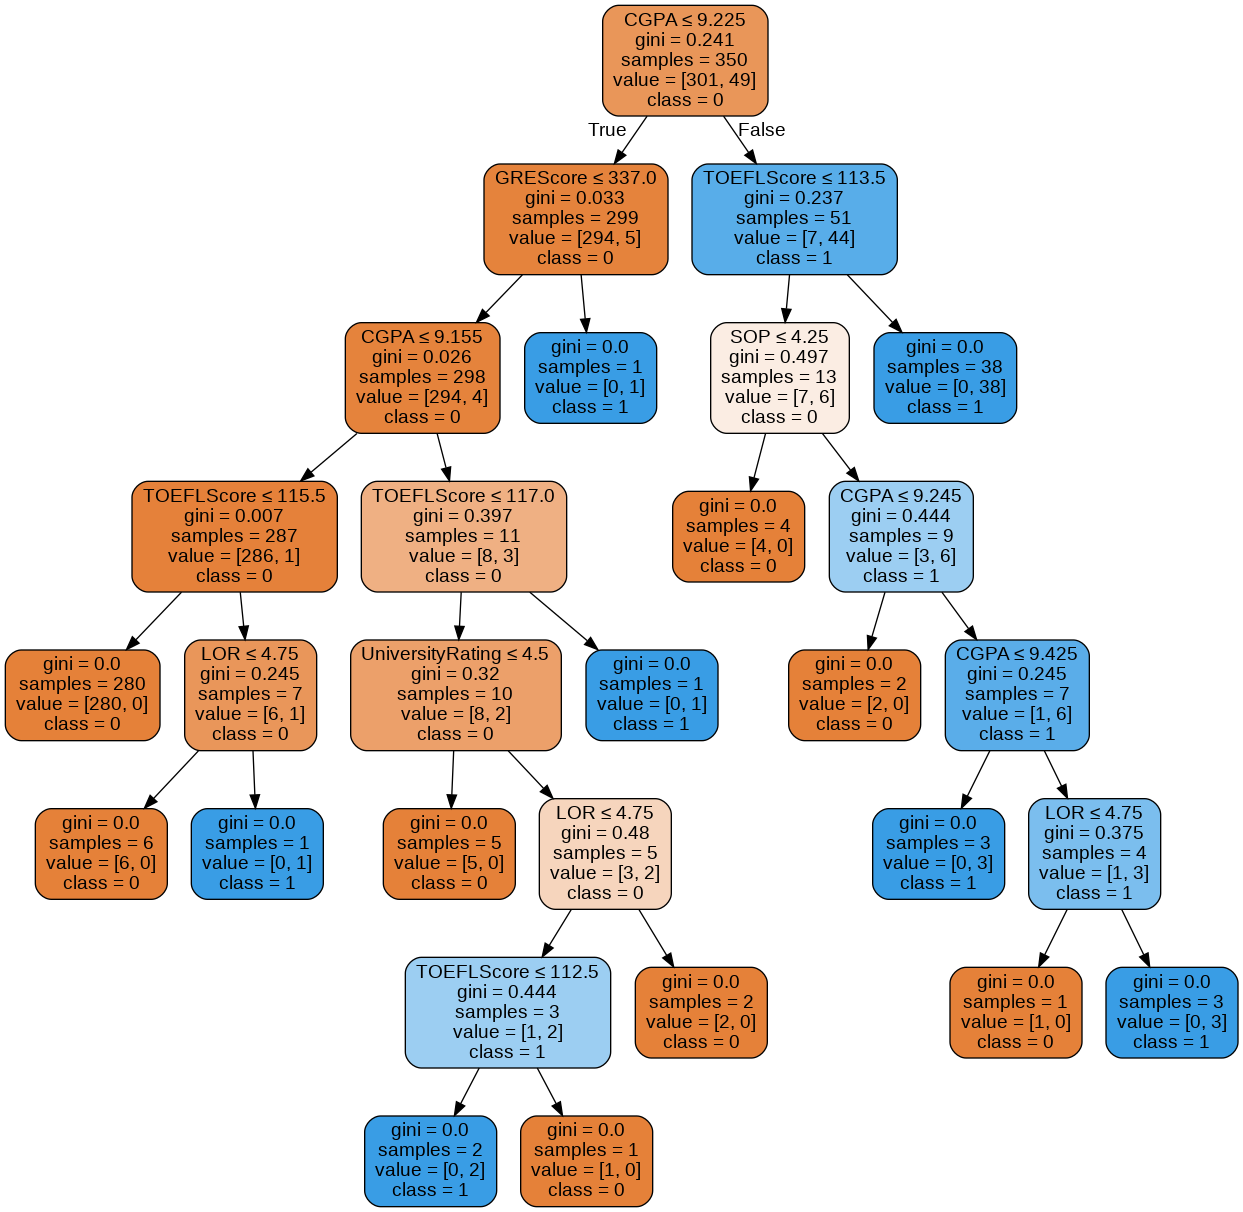

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('admission.png')
Image(graph.create_png())

Optimizing Decision Tree Performance

In [ ]:
#Optimizing
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533333333333334


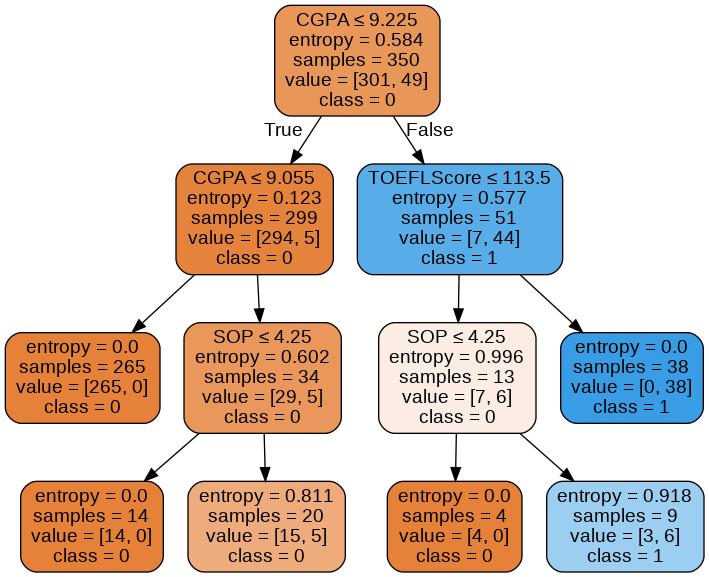

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('admission1.png')
Image(graph.create_png())

[Text(167.40000000000003, 190.26, 'X[5] <= 9.225\nentropy = 0.584\nsamples = 350\nvalue = [301, 49]'),
 Text(66.96000000000001, 135.9, 'X[5] <= 9.055\nentropy = 0.123\nsamples = 299\nvalue = [294, 5]'),
 Text(33.480000000000004, 81.53999999999999, 'entropy = 0.0\nsamples = 265\nvalue = [265, 0]'),
 Text(100.44000000000001, 81.53999999999999, 'X[3] <= 4.25\nentropy = 0.602\nsamples = 34\nvalue = [29, 5]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(133.92000000000002, 27.180000000000007, 'entropy = 0.811\nsamples = 20\nvalue = [15, 5]'),
 Text(267.84000000000003, 135.9, 'X[1] <= 113.5\nentropy = 0.577\nsamples = 51\nvalue = [7, 44]'),
 Text(234.36, 81.53999999999999, 'X[3] <= 4.25\nentropy = 0.996\nsamples = 13\nvalue = [7, 6]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'entropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(301.320000

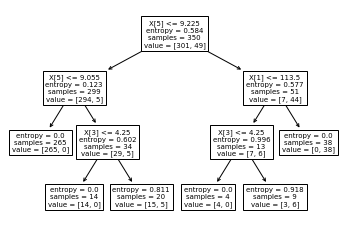

In [ ]:
 from sklearn import tree
 tree.plot_tree(clf)